In [1]:
import numpy

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Input,Reshape,Dense,Lambda,GlobalAveragePooling2D
from tensorflow.keras.models import load_model,Model
import matplotlib.image as mpimg

In [3]:
import os

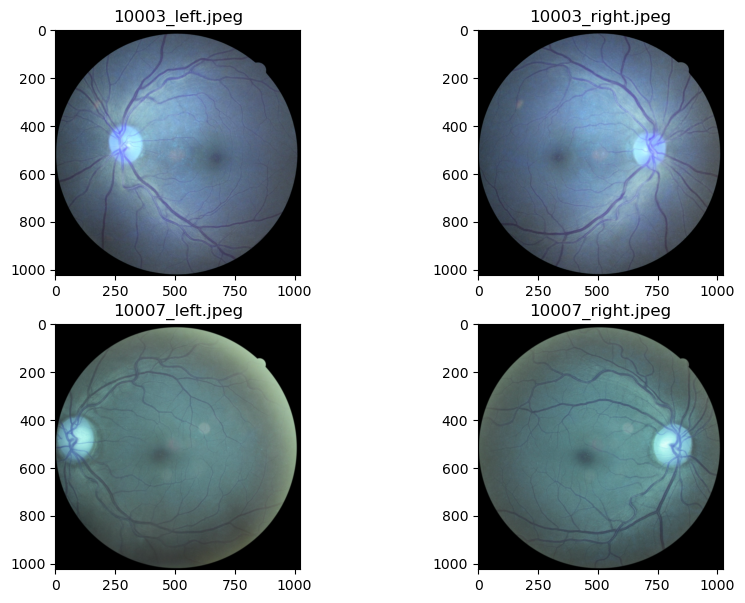

In [7]:
dir=r"C:\Users\Srivatsa\Downloads\resized_train_cropped"
c = 1
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
for images in os.listdir(dir):
    if(c == 5):
        break
    x = os.path.join(dir,images)
    img = cv2.imread(x)
    fig.add_subplot(rows, columns, c)
    plt.imshow(img)
    plt.title(images)
    c+=1

In [8]:
import os
import pandas as pd
df=pd.read_csv(r"C:\Users\Srivatsa\Downloads\trainLabels_cropped.csv")

In [9]:
import os
path, dirs, files = next(os.walk(r"C:\Users\Srivatsa\Downloads\resized_train_cropped"))
file_count = len(files)
print('Number of images: ',file_count)

Number of images:  35108


In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [11]:
d={}
i=0
while(True):
    try:
        d[df['image'][i]]=df['level'][i]
    except:
        break
    i+=1
d

{'10_left': 0,
 '10_right': 0,
 '13_left': 0,
 '13_right': 0,
 '15_left': 1,
 '15_right': 2,
 '16_left': 4,
 '16_right': 4,
 '17_left': 0,
 '17_right': 1,
 '19_left': 0,
 '19_right': 0,
 '20_left': 0,
 '20_right': 0,
 '21_left': 0,
 '21_right': 0,
 '22_left': 0,
 '22_right': 0,
 '23_left': 0,
 '23_right': 0,
 '25_left': 0,
 '25_right': 0,
 '30_left': 1,
 '30_right': 2,
 '31_left': 0,
 '31_right': 0,
 '33_left': 0,
 '33_right': 0,
 '36_left': 1,
 '36_right': 0,
 '40_left': 2,
 '40_right': 0,
 '41_left': 0,
 '41_right': 0,
 '42_left': 0,
 '42_right': 0,
 '46_left': 0,
 '46_right': 0,
 '47_left': 0,
 '47_right': 0,
 '49_left': 0,
 '49_right': 0,
 '51_left': 2,
 '51_right': 0,
 '52_left': 0,
 '52_right': 0,
 '54_left': 2,
 '54_right': 2,
 '56_left': 0,
 '56_right': 0,
 '57_left': 0,
 '57_right': 0,
 '58_left': 0,
 '58_right': 0,
 '59_left': 0,
 '59_right': 0,
 '60_left': 0,
 '60_right': 0,
 '62_left': 0,
 '62_right': 0,
 '64_left': 0,
 '64_right': 0,
 '65_left': 0,
 '65_right': 0,
 '66_lef

In [5]:
from PIL import Image
import cv2
X=[]
Y=[]
l=r"C:\Users\Srivatsa\OneDrive\B Tech\3.1\Project School\Week 9"
for i in range(2000):
    for j in os.listdir(l):
        k=Image.open(os.path.join(l+"\\"+j,os.listdir(os.path.join(l,j))[i]))
#         k=Image.open(os.listdir(os.path.join(l,j))[i])
        X.append(np.asarray(k))
        Y.append(int(j[-1]))
#         print(X)
    if(i%100==0):
        print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


In [6]:
len(Y)

10000

In [7]:

X=np.array(X)
Y=np.array(Y)

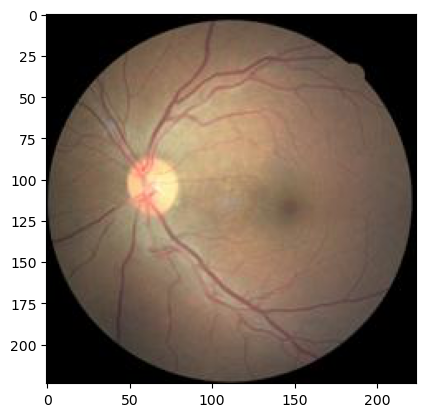

In [12]:
import matplotlib.pyplot as plt
plt.imshow(X[0])

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [10]:

X_train_scaled=X_train/255
X_train_scaled
    

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [19]:
# del X_test_scaled
X_test_scaled=X_test/255

In [11]:
import tensorflow as tf
import tensorflow_hub as hub


In [12]:
mobilenet_model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/3'

In [13]:
pretrained_model=hub.KerasLayer(mobilenet_model,input_shape=(224,224,3), trainable=False)


In [14]:
num_of_classes=5

model=tf.keras.Sequential([
pretrained_model,
tf.keras.layers.Dense(num_of_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
        
)

In [16]:
model.fit(X_train_scaled,Y_train,epochs=40)

Epoch 1/40
250/250 [==============================] - 187s 679ms/step - loss: 1.2181 - acc: 0.4487
Epoch 2/40
250/250 [==============================] - 169s 674ms/step - loss: 1.0190 - acc: 0.5285
Epoch 3/40
250/250 [==============================] - 167s 666ms/step - loss: 0.9565 - acc: 0.5558
Epoch 4/40
250/250 [==============================] - 168s 671ms/step - loss: 0.9139 - acc: 0.5789
Epoch 5/40
250/250 [==============================] - 166s 663ms/step - loss: 0.8865 - acc: 0.5962
Epoch 6/40
250/250 [==============================] - 160s 638ms/step - loss: 0.8706 - acc: 0.6087
Epoch 7/40
250/250 [==============================] - 159s 635ms/step - loss: 0.8477 - acc: 0.6199
Epoch 8/40
250/250 [==============================] - 160s 639ms/step - loss: 0.8255 - acc: 0.6314
Epoch 9/40
250/250 [==============================] - 162s 649ms/step - loss: 0.8134 - acc: 0.6376
Epoch 10/40
250/250 [==============================] - 161s 645ms/step - loss: 0.8018 - acc: 0.6491
Epoch 11/

In [20]:
score,acc=model.evaluate(X_test_scaled,Y_test)
print('Test Loss =',score)
print('Test Accuracy =',acc)

63/63 [==============================] - 46s 667ms/step - loss: 1.0322 - acc: 0.5430
Test Loss = 1.0321766138076782
Test Accuracy = 0.5429999828338623


In [ ]:
model.save("final.h5")